# Stable Diffusion from the ground up

Here we shall build a working Stable Diffusion model using just Python, the Python standard library, Matplotlib for plots, Jupyter Notebook, which is where we shall be writing our code, and nbdev, which we can use to create modules from notebooks.

In [1]:
from pathlib import Path
import pickle, gzip, os, math, time, shutil , matplotlib as mpl, matplotlib.pyplot as plt

##### Get data

In [2]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve

<function urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)>

In [5]:
if not path_gz.exists(): urlretrieve(MNIST_URL,path_gz)

In [6]:
!ls -l data

total 16656
-rw-r--r-- 1 rubanza rubanza 17051982 Jul 21 16:23 mnist.pkl.gz


-rw-r--r--  1  user  staff  15296311  Jul 21 10:30  mnist.pkl.gz
    |       |   |     |        |        |           |
    |       |   |     |        |        |           └── Filename
    |       |   |     |        |        └── Modification time
    |       |   |     |        └── File size (bytes)
    |       |   |     └── Group owner
    |       |   └── User owner  
    |       └── Number of hard links
    └── File permissions

In [7]:
path_gz

PosixPath('data/mnist.pkl.gz')

In [9]:
#with gzip.open('data/mnist.pkl.gz','rb') as f:
    #dataset = pickle.load(f, encoding='latin-1')

In [33]:
dataset

((array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([5, 0, 4, ..., 8, 4, 8])),
 (array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([3, 8, 6, ..., 5, 6, 8])),
 (array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([7, 2, 1, ..., 4, 5, 6])))

In [7]:
with gzip.open(path_gz, 'rb') as f: ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f, encoding='latin-1')

In [8]:
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [19]:
len(lst1)

784

In [31]:
len(lst1)

784

In [28]:
def chunks(x,sz):
    for i in range(0, len(x), sz): yield x[i:i+5]

In [32]:
list(chunks(vals,5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [88]:
val_iter = chunks(vals,5)

In [89]:
val_iter

<generator object chunks at 0x715981808580>

In [90]:
next(val_iter)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [78]:
next(val_iter)

StopIteration: 

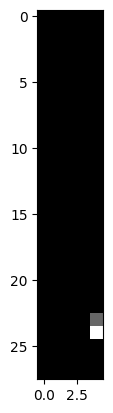

In [33]:
mpl.rcParams['image.cmap']='gray'
plt.imshow(list(chunks(lst1,28)));

(0.0, 28.0)

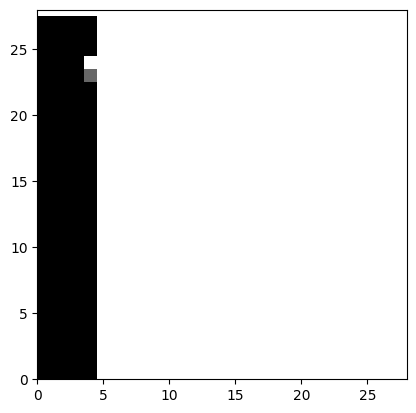

In [34]:
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)))
plt.xlim(0, 28)  # Force x-axis to go 0-28
plt.ylim(0, 28)  # Force y-axis to go 0-28

In [11]:
a = [1,2,3,4,5]
len(a)

5

In [12]:
for i in range(0,5): 
    print(i+1)

1
2
3
4
5


In [13]:
from itertools import islice

In [93]:
it = iter(vals)

In [94]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [95]:
it

In [96]:
next(it)

0.0

In [97]:
next(it),next(it),next(it)

(0.0, 0.0, 0.19140625)

[islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [25]:
it = iter(vals)
islice(it,28)

In [136]:
isit = islice(it,5)
isit

In [137]:
next(isit),next(isit),next(isit)

(0.0, 0.0, 0.0)

In [138]:
next(isit)

0.19140625

In [139]:
next(isit)

0.9296875

In [140]:
next(isit)

StopIteration: 

In [138]:
next(isit)

0.19140625

In [119]:
list(islice(it,5))

[0.98828125, 0.98828125, 0.98828125]

In [26]:
list(islice(it,28))

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [27]:
list(islice(it,28))

[]

In [122]:
next(it)

StopIteration: 

In [98]:
islice(it,2)

In [17]:
list(islice(it,5))

[]

In [103]:
list(islice(it,5))

[]

using lamda

In [12]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))
img

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
 

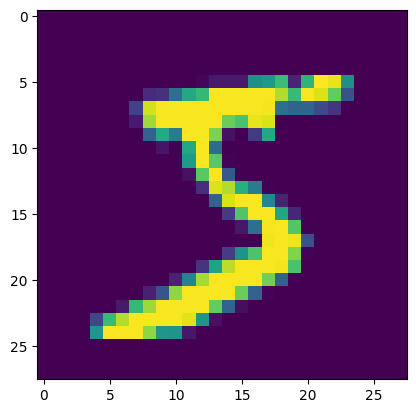

In [13]:
plt.imshow(img);

In [15]:
len(img)

28

In [37]:
it = iter(lst1)
def f(): return list(islice(it,28))

In [43]:
f()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01171875,
 0.0703125,
 0.0703125,
 0.0703125,
 0.4921875,
 0.53125,
 0.68359375,
 0.1015625,
 0.6484375,
 0.99609375,
 0.96484375,
 0.49609375,
 0.0,
 0.0,
 0.0,
 0.0]

In [38]:
#img[28]

#### Matrix and tensors

In [14]:
import torch
from torch import tensor

In [15]:
class Matrix:
    def __init__(self,xs): self.xs = xs
    def __getitem__(self,idxs): return self.xs[idxs[0]][idxs[1]]

In [16]:
img[20][15]

NameError: name 'img' is not defined

In [ ]:
#img[27,25]

In [ ]:
m = Matrix(img)
m[20,15]

In [ ]:
b = [1,2,3]
b

In [ ]:
b = tensor(b)
b

In [ ]:
len(img)

In [ ]:
img_tens = tensor(img)
img_tens.shape

In [22]:
img_tens[20,15]

tensor(0.9883)

In [56]:
s = [1,2,3]
s

[1, 2, 3]

In [64]:
def s_to_int(a):
    a = a+1
    return a

In [65]:
sa = list(map(s_to_int,s))
sa

[2, 3, 4]

In [17]:
(x_train,y_train,x_valid,y_valid) = map(tensor, (x_train,y_train,x_valid,y_valid))

In [18]:
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [19]:
x_train.type()

'torch.FloatTensor'

#### Tensor

In [20]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

In [23]:
imgs_a = x_train[0].reshape((-1,28,28))
imgs_a.shape

torch.Size([1, 28, 28])

In [27]:
tyo = x_train[1].shape

In [29]:
#plt.imshow(tyo)

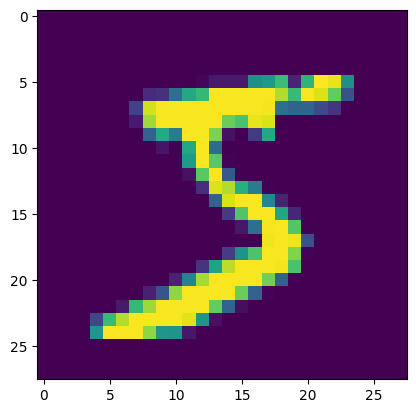

In [21]:
plt.imshow(imgs[0])

In [33]:
imgs[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [35]:
imgs[0,20,15]

tensor(0.9883)

In [30]:
n, c = x_train.shape
n,c

(50000, 784)

In [32]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [33]:
y_train[0].shape

torch.Size([])

In [35]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [36]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

##### Random numbers

Based on the Wichmann Hill algorithm 

In [37]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a,30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [41]:
seed(42)
rnd_state

(43, 1, 1)

In [40]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [42]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x, y, z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [43]:
rand(),rand()

(0.25420336316883324, 0.46884405296716114)

In [44]:
rand()

0.19540525690312815

In [45]:
rand(),rand(),rand(),rand()

(0.28886109883281286,
 0.8643955691976015,
 0.062341103558347655,
 0.5214729908496198)

In [50]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f' In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.44425801591077185
 In child: 0.44425801591077185


In [51]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f' In child: {torch.rand()}')
    os._exit(os.EX_OK)

In parent: tensor([0.9308])


In [52]:
import numpy as np

In [53]:
if os.fork(): print(f'In parent: {np.random.rand(1)}')
else:
    print(f' In child: {np.random.rand()}')
    os._exit(os.EX_OK)

 In child: 0.6953703052450606
In parent: [0.69537031]


In [54]:
from random import random

In [55]:
if os.fork(): print(f'In parent: {random()}')
else:
    print(f' In child: {random()}')
    os._exit(os.EX_OK)

In parent: 0.006104636974047728
 In child: 0.22305777947091454


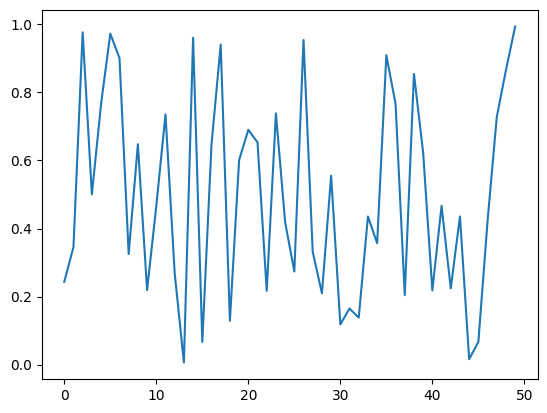

In [56]:
plt.plot([rand() for _ in range(50)]);

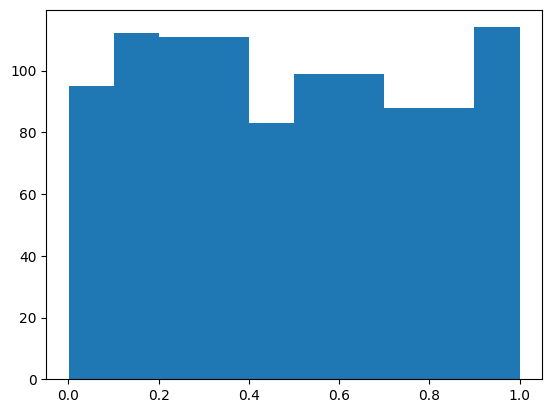

In [58]:
plt.hist([rand() for _ in range(1000)]);